In [25]:
from final_main_av_no_static import *

main.py 실행중... 


In [210]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
def _get_dataset():
    
    
    """Returns (ds_train, ds_test) with augmentations on training set.
    """
    T = torchvision.transforms
        
    ds_train = torchvision.datasets.ImageFolder(root, 
            transform=T.ToTensor())
    ds_test = torchvision.datasets.ImageFolder(root_test, 
            transform=T.ToTensor())
    
    return ds_train, ds_test

In [3]:
def _model_load(path):
    d = torch.load(path)
    m = model.Model(d['training_options'])
    m.load_state_dict(d['model_params'])
    return m

In [5]:
root='../BDD100K_MOT2020_image/bdd100k/images/track/final_train_av' # 0610
root_test='../BDD100K_MOT2020_image/bdd100k/images/track/final_test_av' # 0610

In [6]:
class_names = ['bicycle',
 'bus',
 'car',
 'motorcycle',
 'other person',
 'other vehicle',
 'pedestrian',
 'rider',
 'truck'] # 0610

In [10]:
path='trained_model_after_aug/model_2_80.pt'

In [8]:
ds_train, ds_test = _get_dataset()

In [151]:
m = _model_load(path)

# Determine cuda status
device = torch.device('cpu')
# if torch.cuda.device_count() > 0:
#     device = torch.device('cuda')
#     m = m.to(device)
#     # Multi-GPU slower with small-batch explanations
#     #m = torch.nn.DataParallel(m)
print(ds_test[0][0].shape)
# Generate explanations
m.eval()

torch.Size([3, 32, 32])


Model(
  (pipe): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): _SuperBlock(
      (0): _PreActBlock(
        (pre): Sequential(
          (0): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): HHReLU()
        )
        (main): Sequential(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): HHReLU()
          (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
      )
      (1): _PreActBlock(
        (pre): Sequential(
          (0): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): HHReLU()
        )
        (main): Sequential(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(16

In [16]:
#######################0613-> def로 바꾸기
train_dir='../BDD100K_MOT2020_image/bdd100k/images/track/final_train_av'
test_dir='../BDD100K_MOT2020_image/bdd100k/images/track/final_test_av'

class_names = ['bicycle',
 'bus',
 'car',
 'motorcycle',
 'other person',
 'other vehicle',
 'pedestrian',
 'rider',
 'truck']

## Top2

In [28]:
eps=0.1

In [131]:
torch.Tensor(test).detach()

tensor([[[0.8275, 0.8549, 0.8431,  ..., 0.9098, 0.7608, 0.6941],
         [0.8510, 0.8510, 0.8510,  ..., 0.8784, 0.7373, 0.7608],
         [0.8392, 0.8157, 0.8078,  ..., 0.7882, 0.8078, 0.6784],
         ...,
         [0.0941, 0.1059, 0.1216,  ..., 0.2039, 0.2078, 0.2157],
         [0.1216, 0.1176, 0.1294,  ..., 0.1843, 0.2000, 0.2196],
         [0.1529, 0.1333, 0.1412,  ..., 0.1804, 0.2000, 0.2235]],

        [[0.8588, 0.8863, 0.8902,  ..., 0.9451, 0.7961, 0.7294],
         [0.8941, 0.8941, 0.8980,  ..., 0.9137, 0.7725, 0.7961],
         [0.8863, 0.8667, 0.8588,  ..., 0.8275, 0.8392, 0.7098],
         ...,
         [0.1373, 0.1490, 0.1686,  ..., 0.2431, 0.2471, 0.2549],
         [0.1725, 0.1686, 0.1725,  ..., 0.2157, 0.2314, 0.2510],
         [0.2039, 0.1843, 0.1843,  ..., 0.2118, 0.2314, 0.2588]],

        [[0.9412, 0.9608, 0.9451,  ..., 1.0000, 0.8627, 0.7961],
         [0.9725, 0.9647, 0.9529,  ..., 0.9725, 0.8314, 0.8549],
         [0.9725, 0.9412, 0.9216,  ..., 0.8667, 0.8824, 0.

In [137]:
device = torch.device('cpu')
m = m.to(device)


In [147]:
guess=m(torch.Tensor(torch.Tensor(test)))[0]


In [148]:
softmax = torch.nn.functional.softmax(guess, 0)

In [149]:
softmax

tensor([0.0116, 0.4102, 0.0774, 0.0140, 0.0214, 0.2710, 0.0211, 0.0194, 0.1539],
       grad_fn=<SoftmaxBackward>)

In [150]:
softmax[label]

tensor(0.4102, grad_fn=<SelectBackward>)

In [206]:
random_idx=np.arange()

NameError: name 'random_image' is not defined

In [207]:
jpg_idxs=np.arange(10000)
np.random.seed(42)
np.random.shuffle(jpg_idxs)

In [257]:
pick=5
size=15

In [258]:
class_names

['bicycle',
 'bus',
 'car',
 'motorcycle',
 'other person',
 'other vehicle',
 'pedestrian',
 'rider',
 'truck']

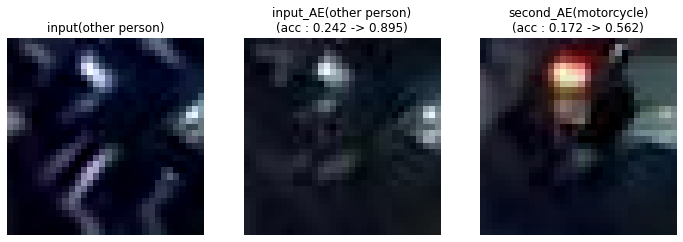

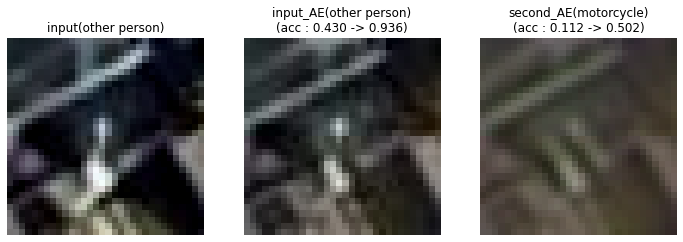

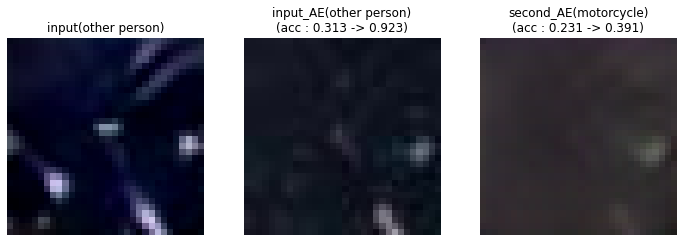

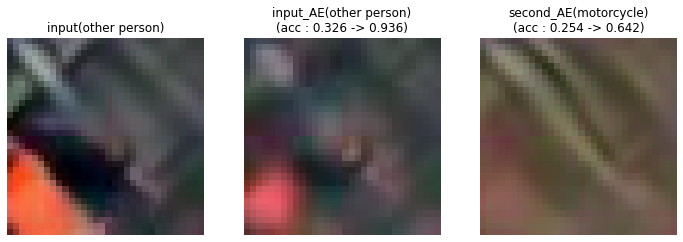

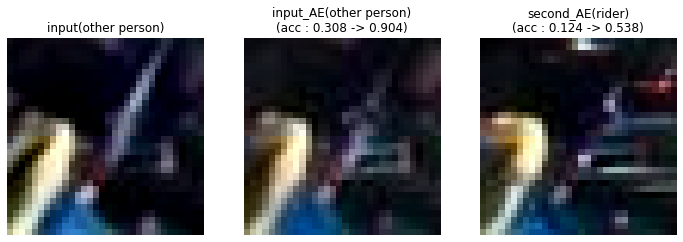

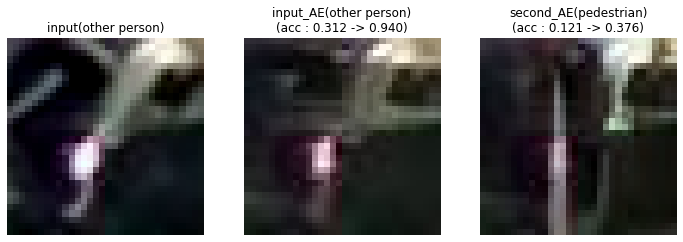

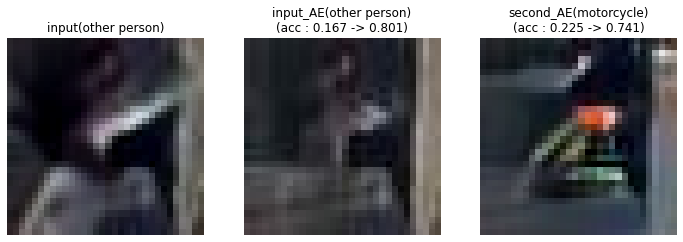

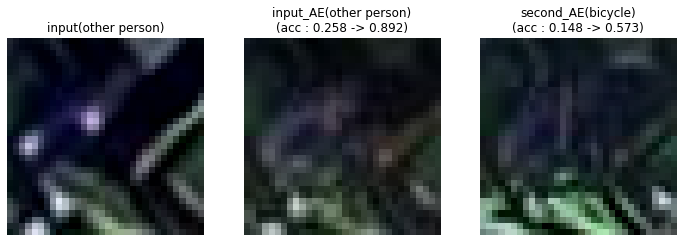

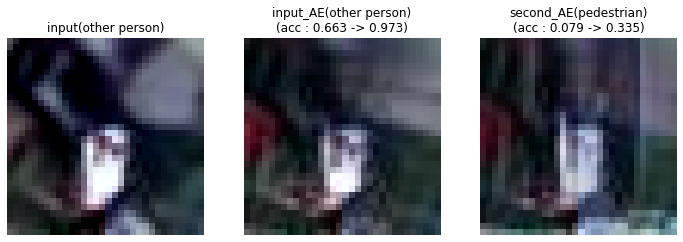

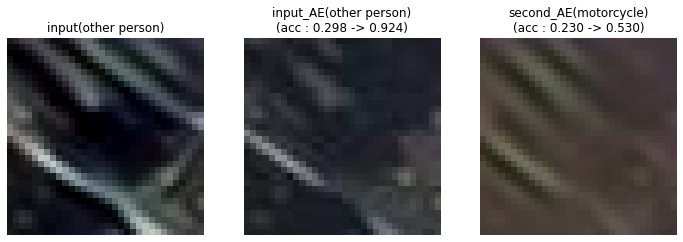

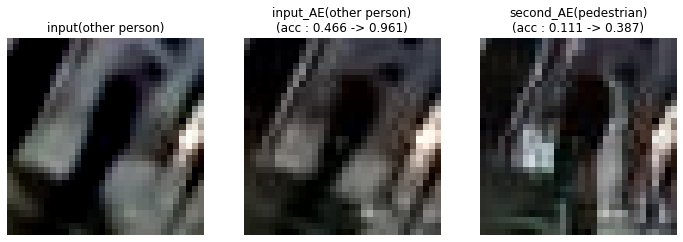

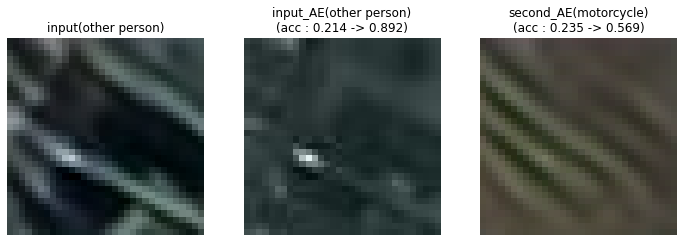

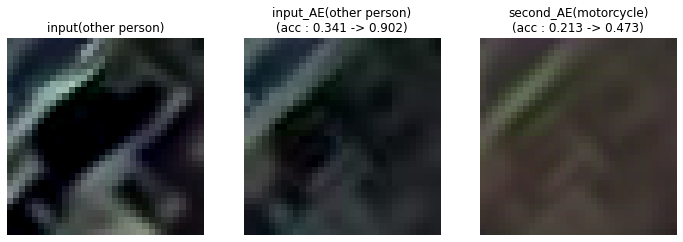

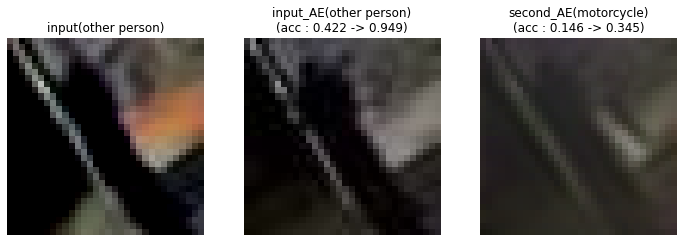

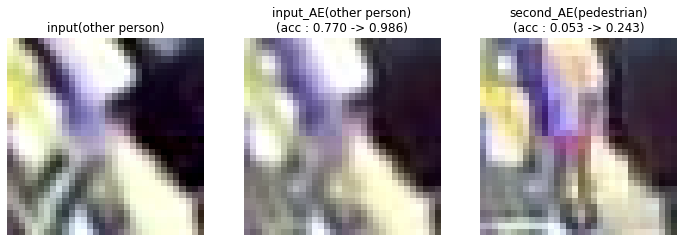

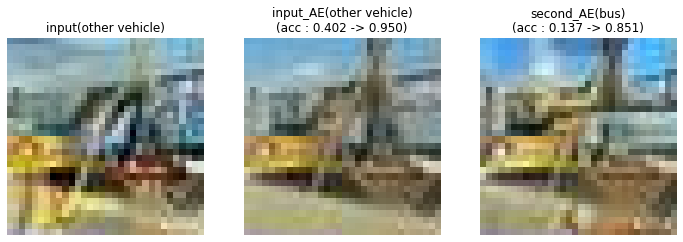

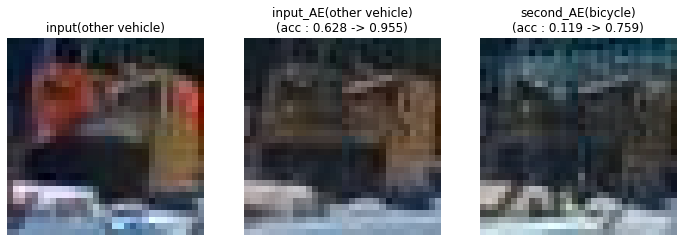

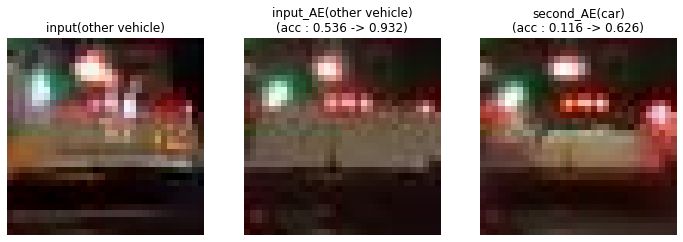

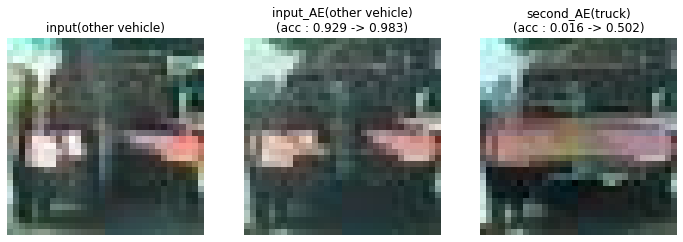

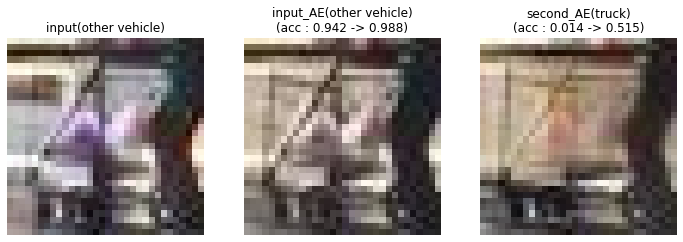

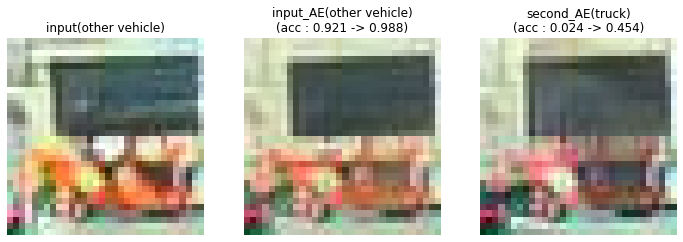

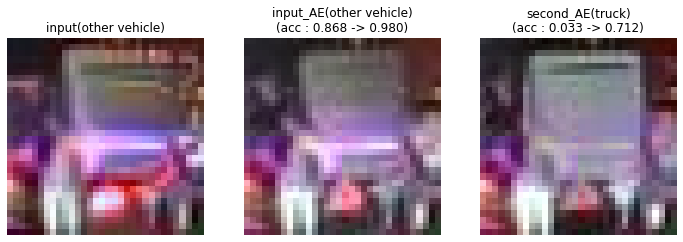

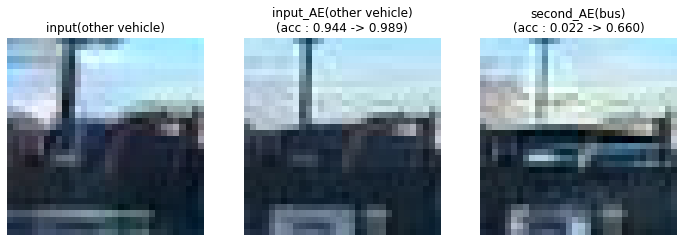

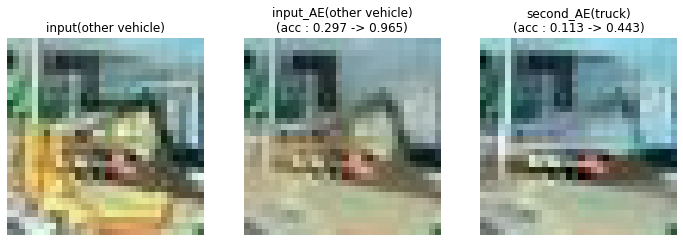

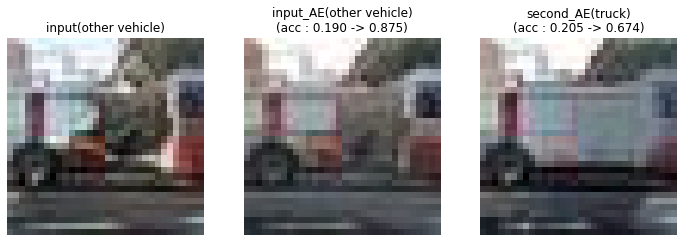

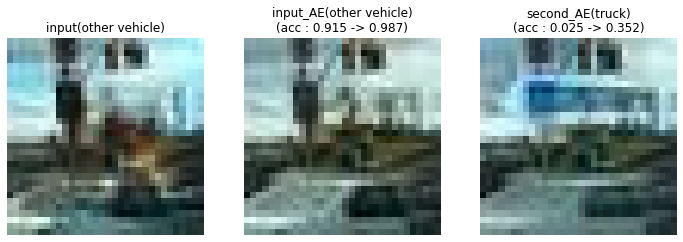

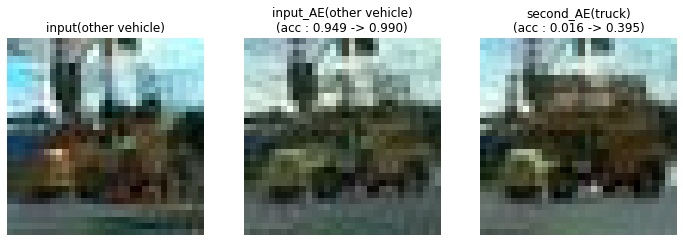

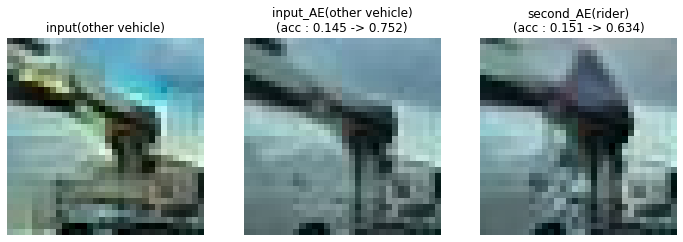

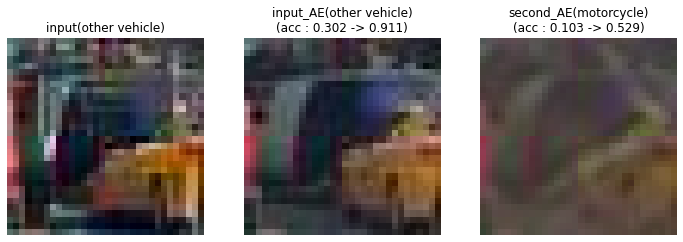

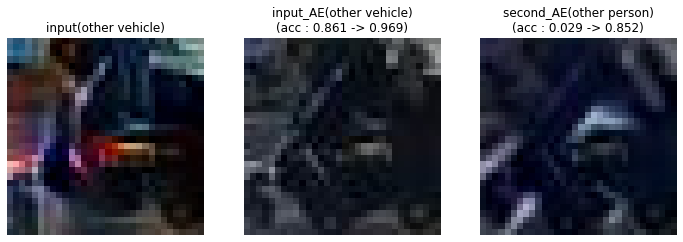

In [259]:

for idx, class_name in enumerate(class_names[4:6]):
    idx+=4
    for jpg_idx in jpg_idxs[pick*size:(pick+1)*size]:
        jpg_names=os.listdir(os.path.join(train_dir, class_name))
        img=plt.imread(os.path.join(train_dir, class_name, jpg_names[jpg_idx]))
        label=idx
        img=np.swapaxes(img,1,2)
        img=np.swapaxes(img,0,1)
        img=torch.Tensor(img)/255 # 0613

        img = img.to(device)

        name = f'{idx}-{class_names[label]}'
    #     d = os.path.join(output_dir, name)
    #     os.makedirs(d)

        # save_image changes the image with torchvision v0.2.2
        input_image=img.clone().cpu().numpy()
        train=input_image

        with torch.no_grad():
            guesses = m(img.unsqueeze(0))[0]
        sm = torch.nn.functional.softmax(guesses, 0)
        second_g = guesses.clone()
        second_g[label] = second_g.min() - 1
        second = second_g.argmax(0).item()

        targs = [label, second, 0]#, 1, 2, 3, 4, 5, 6, 7, 8] # 0613
        expls = adv_images(m, img.unsqueeze(0).repeat(len(targs), 1, 1, 1),
                targs, AdversarialOptions(encourage_labels=True,
                    eps_overshoot=5, eps=eps, steps=35))

        real_image=expls[0].numpy()
        real_label=label
        real_score=f'{sm[label]:3f}'
        second_image=expls[1].numpy()
        second_label=second
        second_score=f'{sm[second]:3f}'

        guess=m(torch.Tensor(real_image))[0]
        softmax = torch.nn.functional.softmax(guess, 0)
        real_score_AE=str(softmax[label].detach().numpy())

        guess=m(torch.Tensor(second_image))[0]
        softmax = torch.nn.functional.softmax(guess, 0)
        second_score_AE=str(softmax[second].detach().numpy())


        ## 0617

        real_image, input_image, second_image=image_npy(input_image, real_image,second_image)

        fig, [ax0, ax1, ax2]=plt.subplots(1,3, figsize=(12,4))
        ax0.imshow(input_image)
        ax0.set_axis_off()
        ax0.set_title('input({})'.format(class_names[label]))

        ax1.imshow(real_image)
        ax1.set_axis_off()
        ax1.set_title('input_AE({})\n(acc : {} -> {})'.format(class_names[label],real_score[:5], real_score_AE[:5] ))

        ax2.imshow(second_image)
        ax2.set_axis_off()
        ax2.set_title('second_AE({})\n(acc : {} -> {})'.format(class_names[second_label], second_score[:5], second_score_AE[:5]))

    #     torchvision.utils.save_image(expls[0], os.path.join(d,
    #             f'_real_was_{sm[label]:.3f}.png'))
    #     torchvision.utils.save_image(expls[1], os.path.join(d,
    # #             f'_second_{class_names[second]}_was_{sm[second]:.3f}.png'))
    #     for targ, expl in zip(targs[2:], expls[2:]):
    #         torchvision.utils.save_image(expl, os.path.join(d,
    #             f'{targ}_{class_names[targ]}_was_{sm[targ]:.3f}.png'))

In [248]:
class_names

['bicycle',
 'bus',
 'car',
 'motorcycle',
 'other person',
 'other vehicle',
 'pedestrian',
 'rider',
 'truck']

In [241]:
def image_npy(input_image,real_image, second_image):
    
    real_image=np.clip(real_image, 0, 1)
    second_image=np.clip(second_image, 0, 1)


    input_image=np.swapaxes(input_image,0,1)
    input_image=np.swapaxes(input_image,1,2)
    input_image=(input_image*255).astype(np.uint8)
    
    real_image=np.swapaxes(real_image,0,1)
    real_image=np.swapaxes(real_image,1,2)
    real_image=(real_image*255).astype(np.uint8)

    second_image=np.swapaxes(second_image,0,1)
    second_image=np.swapaxes(second_image,1,2)
    second_image=(second_image*255).astype(np.uint8)
    
    return input_image,real_image,  second_image
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'second_AE(other vehicle)\n(acc : 0.270 -> 0.972)')

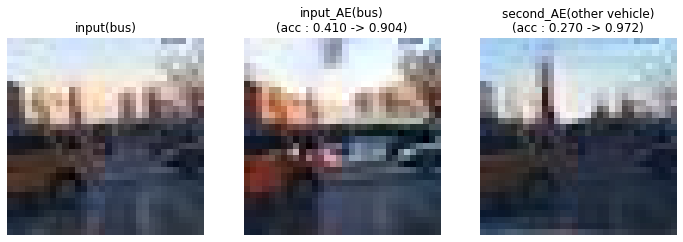

In [202]:
fig, [ax0, ax1, ax2]=plt.subplots(1,3, figsize=(12,4))
ax0.imshow(input_image)
ax0.set_axis_off()
ax0.set_title('input({})'.format(class_names[label]))

ax1.imshow(real_image)
ax1.set_axis_off()
ax1.set_title('input_AE({})\n(acc : {} -> {})'.format(class_names[label],real_score[:5], real_score_AE[:5] ))

ax2.imshow(second_image)
ax2.set_axis_off()
ax2.set_title('second_AE({})\n(acc : {} -> {})'.format(class_names[second_label], second_score[:5], second_score_AE[:5]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'second_AE(other vehicle)\n(acc : 0.270 -> 0.972)')

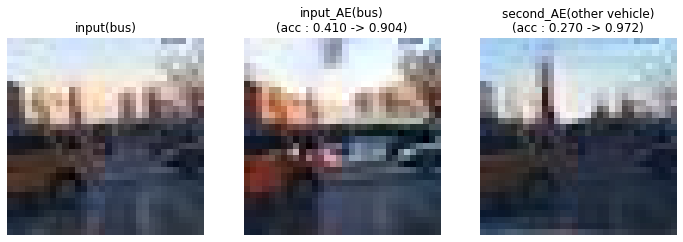

In [202]:

fig, [ax0, ax1, ax2]=plt.subplots(1,3, figsize=(12,4))
ax0.imshow(input_image)
ax0.set_axis_off()
ax0.set_title('input({})'.format(class_names[label]))

ax1.imshow(real_image)
ax1.set_axis_off()
ax1.set_title('input_AE({})\n(acc : {} -> {})'.format(class_names[label],real_score[:5], real_score_AE[:5] ))

ax2.imshow(second_image)
ax2.set_axis_off()
ax2.set_title('second_AE({})\n(acc : {} -> {})'.format(class_names[second_label], second_score[:5], second_score_AE[:5]))

In [180]:
second_score_AE

tensor(0.9723, grad_fn=<SelectBackward>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


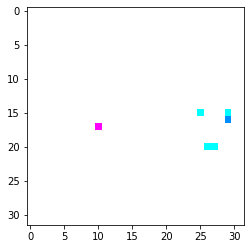

In [50]:
plt.imshow(real_image)

In [1]:
### Local imports
import model

### Environment imports
import click
import math
import os
import shutil
import torch
import torch.utils.data.dataset
import torchvision
import matplotlib.pyplot as plt
import numpy as np
### Configuration settings
# Training rate / size parameters
TRAIN_BATCHSIZE = 128  # Multiplied by number of GPUs
TRAIN_LR = 0.1  # Multiplied by number of GPUs
TRAIN_MOMENTUM = 0.9
TRAIN_WEIGHT_DECAY = 1e-4
TRAIN_EPOCHS = [170, 195, 200]  # Divide lr by 10 at each; finish after last.

# Adversarial training settings
TRAIN_ADV_EPS = 0.01
TRAIN_ADV_L2MIN_EPS = 0.1

# Adversarial robustness parameters
ROBUST_Z = 2
ROBUST_ZETA = 0.2  # Always tandem
ROBUST_ADAPT_L_TARGET = 1.5
ROBUST_ADAPT_PSI_0 = 220 # 0604변경
ROBUST_ADAPT_PSI = 0.02
ROBUST_ADAPT_EPS_POS = 1
ROBUST_ADAPT_EPS_NEG = 0.01

# Offset as [mean, std] of data input.
MODEL_INPUT_OFFSET = [[0.3040, 0.3043, 0.2983], [0.2154, 0.2110, 0.2051]] # 0610
# MODEL_INPUT_OFFSET = [[0.3006, 0.2956, 0.2926], [0.2196, 0.2133, 0.2098]] # 0604
#MODEL_INPUT_OFFSET = [[0.4914, 0.4822, 0.4465], [0.247, 0.243, 0.261]]